# Introduction

## Import Libraries and load JSON

In [136]:
# Importing Libraries
import requests
import pandas as pd
import time
import json
import re
from sqlalchemy import create_engine
import pymysql.cursors
import os
import getpass
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from stop_words import get_stop_words
from PIL import Image

import urllib.request
import os

# Extending display
pd.set_option('display.max_colwidth', 5000)
pd.set_option('display.max_rows', 5000)

In [20]:
with open('all_results.json') as f:
    all_results = json.load(f)

In [21]:
def create_df():
    # Create the frame with columns name
    df = pd.DataFrame(columns=['Pictures_id', 'Width', 'Height', 'Large URL','Full URL', 'Photographer_id','Photographer', 'Avg Color', 'Description', 'Country_id'])
    for i, result in enumerate(all_results):
        # Make sure it matches with above for columns name
        row = pd.DataFrame({
                'Pictures_id': result['id'],
                'Width': result['width'],
                'Height': result['height'],
                'Large URL': result['src']['large'],
                'Full URL': result['url'],
                'Photographer_id': result['photographer_id'],
                'Photographer': result['photographer'],
                'Avg Color': result['avg_color'],
                'Description': result['alt'],
                'Country_id': (i // 80) + 1 # increment every 80 rows
            }, index=[0])
        # iterating and building back the country_id
        df = pd.concat([df,row], ignore_index=True)
    return df

In [22]:
df = create_df()

In [25]:
cleaned_df = df.drop_duplicates(subset = "Pictures_id").dropna()

In [27]:
cleaned_df.shape

(3682, 10)

In [29]:
cleaned_df.head()

,Pictures_id,Width,Height,Large URL,Full URL,Photographer_id,Photographer,Avg Color,Description,Country_id
0,13918727,5304,7952,https://images.pexels.com/photos/13918727/pexels-photo-13918727.jpeg?auto=compress&cs=tinysrgb&h=650&w=940,https://www.pexels.com/photo/sculpture-and-streetlight-near-eiffel-tower-in-paris-france-13918727/,5767088,Eugenia Remark,#5E5141,Black Statue of Man on Top of Building,1
1,14918481,2000,2500,https://images.pexels.com/photos/14918481/pexels-photo-14918481.jpeg?auto=compress&cs=tinysrgb&h=650&w=940,https://www.pexels.com/photo/photo-of-a-mont-san-michele-abbey-in-france-14918481/,406314056,paul jousseau,#6C635C,Photo of a Mont San Michele Abbey in France,1
2,15308877,3629,2433,https://images.pexels.com/photos/15308877/pexels-photo-15308877.jpeg?auto=compress&cs=tinysrgb&h=650&w=940,https://www.pexels.com/photo/concrete-building-view-from-balcony-15308877/,956039,Jill Evans,#7B7B79,Concrete Building View from Balcony,1
3,14544821,2432,3636,https://images.pexels.com/photos/14544821/pexels-photo-14544821.jpeg?auto=compress&cs=tinysrgb&h=650&w=940,https://www.pexels.com/photo/eiffel-tower-and-seine-14544821/,1245209,Polina Chistyakova,#979CA2,Eiffel Tower and Seine,1
4,2363,1600,1066,https://images.pexels.com/photos/2363/france-landmark-lights-night.jpg?auto=compress&cs=tinysrgb&h=650&w=940,https://www.pexels.com/photo/clear-glass-museum-during-golden-hour-2363/,2659,Pixabay,#8E5F38,Clear Glass Museum during Golden Hour,1


## Script to save all images locally

In [28]:
# create a directory to save the images
if not os.path.exists('images'):
    os.makedirs('images')

# loop through the dataframe column containing the large image URLs
for index, row in cleaned_df.iterrows():
    image_url = row['Large URL']
    picture_id = row['Pictures_id']
    response = requests.get(image_url)
    if response.status_code == 200:
        with open(f"images/{picture_id}.jpg", 'wb') as f:
            f.write(response.content)
        print(f"{index} Downloaded image {picture_id}")
    else:
        print(f"Failed to download image {picture_id}")

0 Downloaded image 13918727
1 Downloaded image 14918481
2 Downloaded image 15308877
3 Downloaded image 14544821
4 Downloaded image 2363
5 Downloaded image 2886284
6 Downloaded image 2901209
7 Downloaded image 1125212
8 Downloaded image 3073666
9 Downloaded image 2901215
10 Downloaded image 3182530
11 Downloaded image 342113
12 Downloaded image 1850619
13 Downloaded image 2901212
14 Downloaded image 416779
15 Downloaded image 548077
16 Downloaded image 3290065
17 Downloaded image 1059078
18 Downloaded image 2309272
19 Downloaded image 4039924
20 Downloaded image 3271945
21 Downloaded image 3721426
22 Downloaded image 1488315
23 Downloaded image 161901
24 Downloaded image 2792025
25 Downloaded image 2695680
26 Downloaded image 2344
27 Downloaded image 9381050
28 Downloaded image 2082103
29 Downloaded image 2290912
30 Downloaded image 2574489
31 Downloaded image 532826
32 Downloaded image 460740
33 Downloaded image 1460145
34 Downloaded image 2738173
35 Downloaded image 705771
36 Download

289 Downloaded image 2846014
290 Downloaded image 2846016
291 Downloaded image 2846031
292 Downloaded image 4926960
293 Downloaded image 4621012
294 Downloaded image 235648
295 Downloaded image 2226458
296 Downloaded image 4412615
297 Downloaded image 14752022
298 Downloaded image 11881298
299 Downloaded image 6294700
300 Downloaded image 10578436
301 Downloaded image 8903207
302 Downloaded image 7846139
303 Downloaded image 7846189
304 Downloaded image 6965934
305 Downloaded image 12379105
306 Downloaded image 6294692
307 Downloaded image 6531109
308 Downloaded image 4242790
309 Downloaded image 4096352
310 Downloaded image 4445241
311 Downloaded image 4515795
312 Downloaded image 9068358
313 Downloaded image 7846185
314 Downloaded image 10836079
315 Downloaded image 13289140
316 Downloaded image 13789557
317 Downloaded image 14557597
318 Downloaded image 6876400
319 Downloaded image 6876096
320 Downloaded image 13933421
321 Downloaded image 4215113
322 Downloaded image 3225528
323 Do

573 Downloaded image 208444
574 Downloaded image 3495488
575 Downloaded image 176398
576 Downloaded image 3822201
577 Downloaded image 3334821
578 Downloaded image 674671
579 Downloaded image 260898
580 Downloaded image 2804333
581 Downloaded image 2867732
582 Downloaded image 1765294
583 Downloaded image 4206619
584 Downloaded image 2797526
585 Downloaded image 2867731
586 Downloaded image 5608211
587 Downloaded image 590059
588 Downloaded image 1682751
589 Downloaded image 1007689
590 Downloaded image 2402000
591 Downloaded image 327494
592 Downloaded image 3722813
593 Downloaded image 5608228
594 Downloaded image 3991771
595 Downloaded image 2832190
596 Downloaded image 257433
597 Downloaded image 161224
598 Downloaded image 2108831
599 Downloaded image 4917148
600 Downloaded image 8299700
601 Downloaded image 5608197
602 Downloaded image 5608198
603 Downloaded image 5608205
604 Downloaded image 5608209
605 Downloaded image 5608213
606 Downloaded image 5599607
607 Downloaded image 5

861 Downloaded image 427747
862 Downloaded image 940035
863 Downloaded image 161164
864 Downloaded image 3048526
865 Downloaded image 3048529
866 Downloaded image 3787405
867 Downloaded image 5745818
868 Downloaded image 6249524
869 Downloaded image 3767862
870 Downloaded image 258966
871 Downloaded image 634009
872 Downloaded image 2425464
873 Downloaded image 1743555
874 Downloaded image 2187673
875 Downloaded image 2407672
876 Downloaded image 2890017
877 Downloaded image 3048538
878 Downloaded image 3402955
879 Downloaded image 5745821
880 Downloaded image 2880801
881 Downloaded image 2422253
882 Downloaded image 2193186
883 Downloaded image 4275890
884 Downloaded image 1493088
885 Downloaded image 1008180
886 Downloaded image 2397304
887 Downloaded image 2531455
888 Downloaded image 3225526
889 Downloaded image 753312
890 Downloaded image 2351425
891 Downloaded image 533851
892 Downloaded image 3001333
893 Downloaded image 2880802
894 Downloaded image 2737248
895 Downloaded image 

1142 Downloaded image 2124892
1143 Downloaded image 625417
1144 Downloaded image 461936
1145 Downloaded image 2224357
1146 Downloaded image 2963464
1147 Downloaded image 1895851
1148 Downloaded image 3780226
1149 Downloaded image 1249074
1150 Downloaded image 1615806
1151 Downloaded image 1666466
1152 Downloaded image 1857395
1153 Downloaded image 2547998
1154 Downloaded image 2549158
1155 Downloaded image 1547735
1156 Downloaded image 2549572
1157 Downloaded image 3885725
1158 Downloaded image 1550347
1159 Downloaded image 1550565
1160 Downloaded image 3831829
1161 Downloaded image 7909838
1162 Downloaded image 3572835
1163 Downloaded image 161875
1164 Downloaded image 1615807
1165 Downloaded image 1649301
1166 Downloaded image 1682701
1167 Downloaded image 2273436
1168 Downloaded image 316770
1169 Downloaded image 2549156
1170 Downloaded image 2580352
1171 Downloaded image 2588251
1172 Downloaded image 1536301
1173 Downloaded image 1545560
1174 Downloaded image 1547737
1175 Downloade

1425 Downloaded image 5389407
1426 Downloaded image 4389392
1427 Downloaded image 4099269
1428 Downloaded image 4781064
1429 Downloaded image 3818270
1430 Downloaded image 6013851
1431 Downloaded image 6480613
1432 Downloaded image 6942425
1433 Downloaded image 5516
1434 Downloaded image 5517
1435 Downloaded image 8731540
1436 Downloaded image 9159439
1437 Downloaded image 9159443
1438 Downloaded image 11618609
1439 Downloaded image 11817338
1440 Downloaded image 1486974
1441 Downloaded image 2662116
1442 Downloaded image 417074
1443 Downloaded image 414612
1444 Downloaded image 910307
1445 Downloaded image 2679814
1446 Downloaded image 2662086
1447 Downloaded image 1486902
1448 Downloaded image 457937
1449 Downloaded image 1574181
1450 Downloaded image 2356087
1451 Downloaded image 10344525
1452 Downloaded image 2749500
1453 Downloaded image 1592461
1454 Downloaded image 1292843
1455 Downloaded image 414035
1456 Downloaded image 158398
1457 Downloaded image 1485452
1458 Downloaded ima

1702 Downloaded image 2887207
1703 Downloaded image 2725253
1704 Downloaded image 2314983
1705 Downloaded image 5205097
1706 Downloaded image 3761529
1707 Downloaded image 962464
1708 Downloaded image 1786306
1709 Downloaded image 2468816
1710 Downloaded image 194455
1711 Downloaded image 3715768
1712 Downloaded image 2378278
1713 Downloaded image 2409953
1714 Downloaded image 2780309
1715 Downloaded image 4124381
1716 Downloaded image 4314300
1717 Downloaded image 3358482
1718 Downloaded image 2382889
1719 Downloaded image 3672388
1720 Downloaded image 5205636
1721 Downloaded image 1427431
1722 Downloaded image 2403537
1723 Downloaded image 3126593
1724 Downloaded image 3290386
1725 Downloaded image 2613015
1726 Downloaded image 750895
1727 Downloaded image 2259636
1728 Downloaded image 2445660
1729 Downloaded image 2387874
1730 Downloaded image 2408167
1731 Downloaded image 5205083
1732 Downloaded image 3936815
1733 Downloaded image 2988127
1734 Downloaded image 3974036
1735 Download

1977 Downloaded image 584391
1978 Downloaded image 4543217
1979 Downloaded image 4130431
1980 Downloaded image 4100004
1981 Downloaded image 4340994
1982 Downloaded image 4542971
1983 Downloaded image 9392342
1984 Downloaded image 9645784
1985 Downloaded image 10372155
1986 Downloaded image 10180368
1987 Downloaded image 10180375
1988 Downloaded image 8665702
1989 Downloaded image 7868910
1990 Downloaded image 12369719
1991 Downloaded image 14221575
1992 Downloaded image 10985397
1993 Downloaded image 11118755
1994 Downloaded image 11362119
1995 Downloaded image 12133925
1996 Downloaded image 13715061
1997 Downloaded image 14511981
1998 Downloaded image 13724548
1999 Downloaded image 4916257
2000 Downloaded image 5596956
2001 Downloaded image 5614592
2002 Downloaded image 3367920
2003 Downloaded image 10619941
2004 Downloaded image 618079
2005 Downloaded image 599982
2006 Downloaded image 161153
2007 Downloaded image 823696
2008 Downloaded image 1707310
2009 Downloaded image 2867769
20

2253 Downloaded image 3811727
2254 Downloaded image 13881274
2255 Downloaded image 364298
2256 Downloaded image 771023
2257 Downloaded image 3063174
2258 Downloaded image 3811728
2259 Downloaded image 3811515
2260 Downloaded image 5864096
2261 Downloaded image 3989789
2262 Downloaded image 364312
2263 Downloaded image 364316
2266 Downloaded image 5878525
2267 Downloaded image 713768
2268 Downloaded image 364319
2269 Downloaded image 161077
2270 Downloaded image 3046347
2271 Downloaded image 15849726
2272 Downloaded image 15808331
2273 Downloaded image 5609333
2275 Downloaded image 4610741
2276 Downloaded image 8904828
2277 Downloaded image 4863968
2279 Downloaded image 12916271
2280 Downloaded image 6531916
2281 Downloaded image 5612851
2282 Downloaded image 4428147
2283 Downloaded image 3811729
2284 Downloaded image 14693287
2285 Downloaded image 11261851
2286 Downloaded image 7454385
2287 Downloaded image 8211515
2288 Downloaded image 6153512
2289 Downloaded image 6443003
2290 Downlo

2548 Downloaded image 5335223
2549 Downloaded image 3596017
2560 Downloaded image 1703314
2561 Downloaded image 1535244
2562 Downloaded image 1722206
2563 Downloaded image 3889843
2564 Downloaded image 4916534
2565 Downloaded image 3889986
2566 Downloaded image 3889891
2567 Downloaded image 3889764
2568 Downloaded image 3889851
2569 Downloaded image 3889763
2570 Downloaded image 2215787
2571 Downloaded image 2438056
2572 Downloaded image 1703317
2573 Downloaded image 2404046
2574 Downloaded image 3909922
2575 Downloaded image 4652127
2576 Downloaded image 3889762
2577 Downloaded image 3889892
2578 Downloaded image 5472511
2579 Downloaded image 2982449
2580 Downloaded image 1703312
2581 Downloaded image 3889825
2582 Downloaded image 4651971
2583 Downloaded image 2971385
2584 Downloaded image 3250368
2585 Downloaded image 943541
2586 Downloaded image 3889895
2587 Downloaded image 4652066
2588 Downloaded image 3123690
2589 Downloaded image 3049885
2590 Downloaded image 943535
2591 Downloa

2838 Downloaded image 4356143
2839 Downloaded image 13420332
2840 Downloaded image 8799566
2841 Downloaded image 5609738
2842 Downloaded image 5313569
2843 Downloaded image 10210881
2844 Downloaded image 11208768
2845 Downloaded image 13329633
2846 Downloaded image 4356135
2847 Downloaded image 5313546
2848 Downloaded image 3956124
2849 Downloaded image 4397893
2850 Downloaded image 10928747
2851 Downloaded image 3874328
2852 Downloaded image 4353815
2853 Downloaded image 4551196
2854 Downloaded image 4269596
2855 Downloaded image 14389954
2856 Downloaded image 12631016
2857 Downloaded image 11517391
2858 Downloaded image 15167888
2859 Downloaded image 13420333
2860 Downloaded image 5593599
2861 Downloaded image 4397886
2862 Downloaded image 10547124
2863 Downloaded image 10971769
2864 Downloaded image 14360304
2865 Downloaded image 6679679
2866 Downloaded image 6034199
2867 Downloaded image 4002632
2868 Downloaded image 5488755
2869 Downloaded image 4356138
2870 Downloaded image 43122

3126 Downloaded image 6469816
3129 Downloaded image 1374286
3131 Downloaded image 6422210
3132 Downloaded image 891116
3143 Downloaded image 4408406
3144 Downloaded image 9424943
3145 Downloaded image 7693851
3146 Downloaded image 7693834
3147 Downloaded image 14943832
3148 Downloaded image 6460890
3149 Downloaded image 7522628
3150 Downloaded image 6469817
3151 Downloaded image 6469818
3152 Downloaded image 14809503
3153 Downloaded image 10277617
3154 Downloaded image 10639387
3155 Downloaded image 10639388
3156 Downloaded image 6469821
3157 Downloaded image 13945021
3158 Downloaded image 12815872
3159 Downloaded image 13296998
3160 Downloaded image 13296835
3161 Downloaded image 13297005
3162 Downloaded image 15253356
3163 Downloaded image 6460892
3164 Downloaded image 6460995
3165 Downloaded image 7693836
3166 Downloaded image 7693839
3167 Downloaded image 7295776
3168 Downloaded image 10639389
3169 Downloaded image 9537507
3170 Downloaded image 7512396
3171 Downloaded image 7512399

3433 Downloaded image 12368762
3434 Downloaded image 10973788
3435 Downloaded image 12376423
3436 Downloaded image 13119027
3437 Downloaded image 13527884
3438 Downloaded image 8626607
3439 Downloaded image 14634010
3440 Downloaded image 1308688
3441 Downloaded image 573122
3442 Downloaded image 1060803
3443 Downloaded image 13350668
3444 Downloaded image 1684168
3445 Downloaded image 3348377
3446 Downloaded image 3158519
3447 Downloaded image 8242973
3448 Downloaded image 545901
3449 Downloaded image 2516401
3450 Downloaded image 1308659
3451 Downloaded image 13769507
3452 Downloaded image 12185637
3453 Downloaded image 13200123
3454 Downloaded image 13600189
3455 Downloaded image 4042406
3456 Downloaded image 5196973
3457 Downloaded image 8291739
3458 Downloaded image 8940633
3459 Downloaded image 5542897
3460 Downloaded image 13430642
3461 Downloaded image 11545053
3462 Downloaded image 13593214
3463 Downloaded image 4042400
3464 Downloaded image 4161812
3465 Downloaded image 952086

3767 Downloaded image 11037382
3770 Downloaded image 3608981
3781 Downloaded image 13729433
3783 Downloaded image 15816750
3784 Downloaded image 5728694
3785 Downloaded image 12167059
3786 Downloaded image 10386597
3787 Downloaded image 10482687
3788 Downloaded image 8667693
3789 Downloaded image 14745253
3790 Downloaded image 9375981
3791 Downloaded image 8667695
3792 Downloaded image 7280620
3793 Downloaded image 7417907
3794 Downloaded image 10998491
3795 Downloaded image 12166895
3796 Downloaded image 9951371
3797 Downloaded image 10482689
3798 Downloaded image 8693279
3840 Downloaded image 1534057
3841 Downloaded image 2762920
3842 Downloaded image 2495575
3843 Downloaded image 5279020
3844 Downloaded image 4106856
3845 Downloaded image 5819235
3846 Downloaded image 6060011
3847 Downloaded image 1531677
3848 Downloaded image 11295223
3849 Downloaded image 5984848
3850 Downloaded image 5740018
3851 Downloaded image 6199401
3852 Downloaded image 4300993
3853 Downloaded image 1129126

# Machine Learning

## Import ML Libraries

In [54]:
# for loading/processing the images  
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [30]:
cleaned_df.shape

(3682, 10)

In [32]:
test = cleaned_df[:10]
test.shape

(10, 10)

In [33]:
test.head()

,Pictures_id,Width,Height,Large URL,Full URL,Photographer_id,Photographer,Avg Color,Description,Country_id
0,13918727,5304,7952,https://images.pexels.com/photos/13918727/pexels-photo-13918727.jpeg?auto=compress&cs=tinysrgb&h=650&w=940,https://www.pexels.com/photo/sculpture-and-streetlight-near-eiffel-tower-in-paris-france-13918727/,5767088,Eugenia Remark,#5E5141,Black Statue of Man on Top of Building,1
1,14918481,2000,2500,https://images.pexels.com/photos/14918481/pexels-photo-14918481.jpeg?auto=compress&cs=tinysrgb&h=650&w=940,https://www.pexels.com/photo/photo-of-a-mont-san-michele-abbey-in-france-14918481/,406314056,paul jousseau,#6C635C,Photo of a Mont San Michele Abbey in France,1
2,15308877,3629,2433,https://images.pexels.com/photos/15308877/pexels-photo-15308877.jpeg?auto=compress&cs=tinysrgb&h=650&w=940,https://www.pexels.com/photo/concrete-building-view-from-balcony-15308877/,956039,Jill Evans,#7B7B79,Concrete Building View from Balcony,1
3,14544821,2432,3636,https://images.pexels.com/photos/14544821/pexels-photo-14544821.jpeg?auto=compress&cs=tinysrgb&h=650&w=940,https://www.pexels.com/photo/eiffel-tower-and-seine-14544821/,1245209,Polina Chistyakova,#979CA2,Eiffel Tower and Seine,1
4,2363,1600,1066,https://images.pexels.com/photos/2363/france-landmark-lights-night.jpg?auto=compress&cs=tinysrgb&h=650&w=940,https://www.pexels.com/photo/clear-glass-museum-during-golden-hour-2363/,2659,Pixabay,#8E5F38,Clear Glass Museum during Golden Hour,1


In [50]:
path = r"C:/Users/monkeyluffy14/Desktop/Final Project/test"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
pictures = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the pictures list
            pictures.append(file.name)

In [51]:
pictures

['11844578.jpg',
 '11984085.jpg',
 '12001661.jpg',
 '12001662.jpg',
 '12001665.jpg',
 '12001672.jpg',
 '12001673.jpg',
 '12002196.jpg',
 '12168511.jpg',
 '12740978.jpg',
 '13636152.jpg',
 '2649167.jpg',
 '3992266.jpg',
 '4048381.jpg',
 '4048396.jpg',
 '4048404.jpg',
 '4745817.jpg',
 '4881523.jpg',
 '5159067.jpg',
 '5159072.jpg',
 '5709844.jpg',
 '5739940.jpg',
 '5769405.jpg',
 '5769453.jpg',
 '5819226.jpg',
 '6535002.jpg',
 '6535004.jpg',
 '6901170.jpg',
 '7250859.jpg',
 '7250860.jpg',
 '7250861.jpg',
 '8128721.jpg',
 '8520931.jpg',
 '8520932.jpg',
 '9307972.jpg']

In [49]:
len(pictures)

35

In [55]:
# load the image as a 224x224 array
img = load_img(pictures[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)
(224, 224, 3)

(224, 224, 3)


(224, 224, 3)

In [56]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)
(1, 224, 224, 3)

(1, 224, 224, 3)


(1, 224, 224, 3)

In [57]:
x = preprocess_input(reshaped_img)
x

array([[[[ -92.939    , -110.779    , -115.68     ],
         [-103.939    , -112.779    , -111.68     ],
         [ -78.939    ,  -68.779    ,  -73.68     ],
         ...,
         [  29.060997 ,  -22.779    ,  -51.68     ],
         [  13.060997 ,  -36.779    ,  -63.68     ],
         [  -8.939003 ,  -55.779    ,  -78.68     ]],

        [[ -15.939003 ,  -41.779    ,  -50.68     ],
         [-102.939    ,  -90.779    ,  -81.68     ],
         [ -36.939003 ,   -9.778999 ,    2.3199997],
         ...,
         [  38.060997 ,  -15.778999 ,  -44.68     ],
         [  22.060997 ,  -30.779    ,  -56.68     ],
         [   2.060997 ,  -46.779    ,  -71.68     ]],

        [[  43.060997 ,    1.2210007,  -12.68     ],
         [ -78.939    ,  -67.779    ,  -62.68     ],
         [-103.939    , -100.779    ,  -92.68     ],
         ...,
         [  45.060997 ,   -9.778999 ,  -39.68     ],
         [  28.060997 ,  -23.779    ,  -52.68     ],
         [  11.060997 ,  -38.779    ,  -65.68     ]],

In [58]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553467096/553467096 [==============================] - 18s 0us/step


In [63]:
reshaped_img.shape

(1, 224, 224, 3)

In [64]:
features = model.predict(reshaped_img)
print(features.shape)

1/1 [==============================] - 0s 346ms/step
(1, 4096)


In [65]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [66]:
data = {}
p = r"C:/Users/monkeyluffy14/Desktop/Final Project/test"

# lop through each image in the dataset
for pic in pictures:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(pic,model)
        data[pic] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

1/1 [==============================] - 0s 159ms/step


In [67]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

In [68]:
filenames

array(['11844578.jpg', '11984085.jpg', '12001661.jpg', '12001662.jpg',
       '12001665.jpg', '12001672.jpg', '12001673.jpg', '12002196.jpg',
       '12168511.jpg', '12740978.jpg', '13636152.jpg', '2649167.jpg',
       '3992266.jpg', '4048381.jpg', '4048396.jpg', '4048404.jpg',
       '4745817.jpg', '4881523.jpg', '5159067.jpg', '5159072.jpg',
       '5709844.jpg', '5739940.jpg', '5769405.jpg', '5769453.jpg',
       '5819226.jpg', '6535002.jpg', '6535004.jpg', '6901170.jpg',
       '7250859.jpg', '7250860.jpg', '7250861.jpg', '8128721.jpg',
       '8520931.jpg', '8520932.jpg', '9307972.jpg'], dtype='<U12')

In [74]:
# get a list of just the features
feat = np.array(list(data.values()))
feat.shape

(35, 1, 4096)

In [76]:
# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

(35, 4096)

In [137]:
# create a list of filenames
filenames = list(data.keys())

# create a list of features
features = [data[filename] for filename in filenames]

# create a DataFrame with columns for the filename and features
df = pd.DataFrame({'filename': filenames, 'features': features})
df

,filename,features
0,11844578.jpg,"[[0.0, 2.1334567, 0.20712996, 0.0, 0.88554585, 0.0, 1.8132892, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2860076, 0.0, 1.209703, 3.5436087, 2.7225304, 0.0, 6.4637384, 4.152807, 0.0, 0.0, 0.0, 0.0, 0.9264141, 1.3329382, 0.0, 0.73478395, 0.0, 0.0, 1.5911754, 2.5545065, 0.0, 0.0, 1.0278301, 0.0, 0.0, 0.4574291, 0.27959383, 0.0, 1.7054937, 0.0, 0.0, 0.30196863, 0.0, 0.8093231, 0.5450594, 0.0, 0.0, 1.2080078, 0.0, 0.0, 0.0, 0.4190719, 0.0, 0.0, 0.9593886, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2798283, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6353953, 0.9250457, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7496659, 0.0, 3.5633502, 0.0, 0.0, 0.0, 0.0, 1.1617482, 0.0, 0.0, 0.0, 0.0, 1.7308624, 0.0, 4.295051, 1.8972278, 0.0, 0.0, 0.0, 1.8212285, 0.0, 0.0, ...]]"
1,11984085.jpg,"[[0.0, 2.8332129, 0.0, 3.8692985, 0.0, 0.8764112, 0.0, 1.9643984, 0.0, 0.0, 0.0, 0.0, 2.6045818, 0.0, 0.0, 0.0, 0.0, 2.9859736, 1.2597315, 2.565509, 5.231926, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4802402, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6919268, 1.1050677, 3.0902467, 0.0, 0.4442428, 0.0, 0.0, 0.14457312, 0.13807485, 0.0, 0.0, 0.0, 2.0945094, 0.048362017, 0.0, 4.5987854, 0.0, 1.9497081, 0.0, 5.6654553, 0.0, 0.0, 0.0, 0.0, 1.4845273, 0.0, 0.0, 0.0, 3.3462176, 0.0, 0.0, 0.0, 0.0, 0.83779085, 0.0, 0.0, 0.0, 0.7970537, 0.16477299, 0.0, 0.0, 0.0, 0.5971442, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7333658, 0.0, 0.0, 4.0243683, 0.50129384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]]"
2,12001661.jpg,"[[1.0074029, 0.23828247, 0.18707994, 0.3578414, 0.0, 0.0, 0.0, 1.0014014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6256924, 0.0, 1.0508678, 0.37709627, 1.4443926, 0.42470583, 3.7250733, 0.0, 2.5985107, 0.0, 0.0, 1.2623636, 0.0, 0.8846294, 0.0, 0.0, 0.0, 0.0, 0.7713131, 6.6876616, 0.85361534, 0.0, 5.223719, 2.2261505, 0.0, 2.0649543, 0.75504804, 1.0729841, 1.2874036, 0.0, 0.28133664, 0.0, 1.1663153, 0.0, 0.4239778, 0.50666827, 0.0, 0.0, 2.196952, 1.0340331, 0.0, 0.0, 0.312433, 0.6950209, 0.0, 0.0, 0.0, 1.7125583, 0.0, 0.67365247, 1.05037, 0.0, 0.0, 0.0, 0.0, 0.0, 5.7388606, 0.0, 0.0, 0.10320887, 0.0, 1.4176705, 1.7939132, 0.0, 0.3236816, 0.0, 0.0, 0.0, 1.4235184, 0.77406156, 0.9196972, 0.0, 0.0, 0.0, 3.001364, 1.4201252, 0.0, 1.8128409, 0.9308753, 0.5095386, 2.2804642, 4.1554894, 0.0, 0.0, 0.5320722, 0.0, ...]]"
3,12001662.jpg,"[[0.0, 0.962595, 0.0, 0.0, 1.4916232, 0.0, 0.13684267, 0.0, 0.0, 1.0890126, 0.0, 0.0, 0.0, 0.0, 0.29153466, 0.0, 0.5700628, 0.5741323, 1.159806, 0.0, 2.1132684, 2.0787473, 0.0, 0.84175265, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.34529573, 2.7916052, 1.3464135, 0.0, 3.4025884, 0.0, 0.0, 2.3509216, 0.0, 0.0, 2.242829, 0.0, 0.0, 1.3054991, 0.0, 0.0, 3.0661767, 0.0, 0.0, 0.10012044, 0.0, 0.13540596, 1.7641785, 0.0, 0.0, 0.84124506, 0.0, 0.0, 1.3180836, 0.0, 0.0, 0.0, 2.9115987, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5187054, 0.0, 0.0, 0.0, 2.1414447, 0.0, 1.6855537, 0.0, 0.17645252, 0.0, 0.0, 0.0, 0.28318983, 0.0, 1.9439522, 1.7138864, 0.0, 0.0, 2.9305828, 1.4693315, 0.0, 2.767321, 0.6476647, 0.0, 0.0, 1.054322, 0.88652635, 1.9109519, 0.0, 0.0, ...]]"
4,12001665.jpg,"[[0.24878079, 1.8607199, 0.0, 0.0, 0.0, 0.0, 0.0, 0.60046124, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4680264, 0.0, 2.601376, 1.9812188, 3.0620737, 0.0, 1.306047, 2.2833354, 1.7770753, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35931093, 1.1695149, 0.0, 0.0, 2.8329084, 0.0, 1.3095162, 0.0, 0.0, 3.3653154, 0.0, 0.0, 1.5480156, 0.0, 0.0, 0.18445963, 0.0, 0.0, 3.5722415, 0.5385685, 0.0, 1.3074368, 0.0, 0.0, 1.6991947, 1.7128073, 0.0, 0.0, 0.08841777, 0.0, 0.0, 5.4141026, 0.0, 0.0, 0.0, 0.0, 0.0, 2.450888, 0.0, 0.0, 0.0, 0.0, 1.3474202, 1.9754771, 0.0, 0.2252037, 0.0, 0.0, 0.9398161, 2.3064744, 0.0, 0.10544753, 0.13329303, 0.0, 0.0, 0.48138037, 0.0, 0.0, 0.4406214, 1.3992685, 1.9089096, 2.2000394, 1.0779424, 0.0, 1.7849109, 0.0, 0.0, ...]]"
5,12001672.jpg,"[[0.0, 2.2604191, 0.85087025, 0.42498353, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1911808, 0.34777752, 1.6487298, 0.0, 2.657744, 1.7071625

In [79]:
# save the DataFrame to a CSV file
df.to_csv('pic_features.csv', index=False)

In [80]:
pca = PCA(n_components=20, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [138]:
x

array([[ 1.47766094e+01, -1.73061905e+01,  7.78841877e+00,
        -9.31220245e+00,  1.26859169e+01,  3.08554745e+00,
         9.28037167e-01, -1.75296021e+00,  5.69140673e-01,
         1.04089165e+00,  1.07198105e+01, -8.54058075e+00,
        -1.24284534e+01, -1.68049850e+01,  1.17422657e+01,
        -1.25098677e+01, -1.09313030e+01,  1.53433919e+00,
        -3.46907973e-02, -1.53188362e+01],
       [ 2.62596664e+01,  3.92198443e+00, -1.44521103e+01,
         5.04848595e+01,  7.00953960e+00, -1.20491571e+01,
        -2.49170647e+01, -3.03082695e+01, -5.47403693e-01,
        -7.43143272e+00,  1.37440157e+01,  3.00826931e+00,
         3.25702429e+00,  1.22797565e+01, -1.98547268e+00,
        -1.38882618e+01,  6.01824379e+00,  4.42579448e-01,
         4.95915604e+00,  3.15941000e+00],
       [ 1.57256021e+01,  1.64786758e+01, -2.19701328e+01,
        -9.36010933e+00, -4.84145403e+00,  1.21206188e+01,
        -1.15683055e+00, -2.81238174e+00, -5.34836006e+00,
         1.56973534e+01, -1.7

In [125]:
kmeans = KMeans(n_clusters=5, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=22)

In [126]:
kmeans.labels_

array([0, 1, 3, 3, 3, 3, 3, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 4, 4, 1, 1, 2, 1, 1, 1, 0, 1])

In [127]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [128]:
groups

{0: ['11844578.jpg',
  '12168511.jpg',
  '2649167.jpg',
  '4048396.jpg',
  '4745817.jpg',
  '5709844.jpg',
  '5739940.jpg',
  '5819226.jpg',
  '8520932.jpg'],
 1: ['11984085.jpg',
  '12002196.jpg',
  '12740978.jpg',
  '13636152.jpg',
  '3992266.jpg',
  '4048381.jpg',
  '4048404.jpg',
  '4881523.jpg',
  '5159067.jpg',
  '5159072.jpg',
  '5769405.jpg',
  '5769453.jpg',
  '6901170.jpg',
  '7250859.jpg',
  '7250861.jpg',
  '8128721.jpg',
  '8520931.jpg',
  '9307972.jpg'],
 3: ['12001661.jpg',
  '12001662.jpg',
  '12001665.jpg',
  '12001672.jpg',
  '12001673.jpg'],
 4: ['6535002.jpg', '6535004.jpg'],
 2: ['7250860.jpg']}

In [129]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

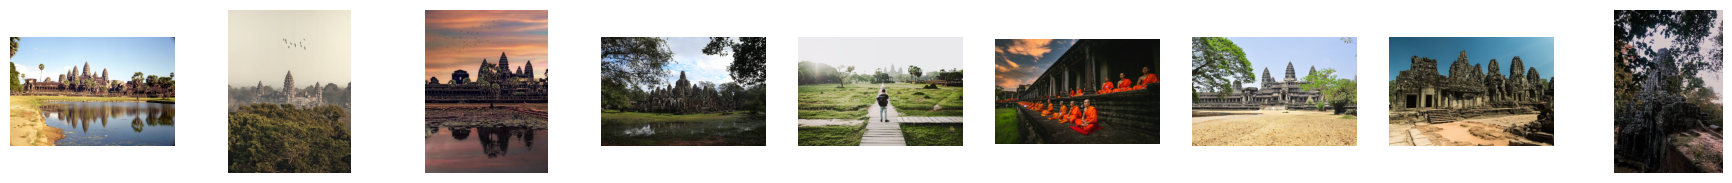

In [130]:
view_cluster(0)

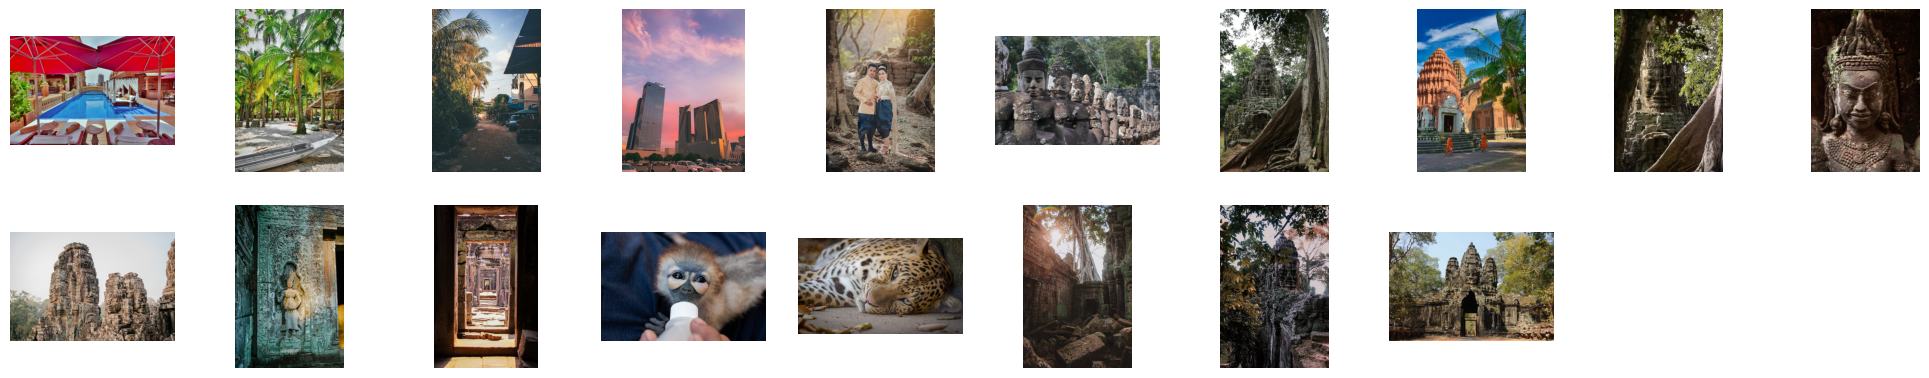

In [131]:
view_cluster(1)

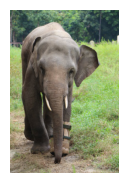

In [132]:
view_cluster(2)

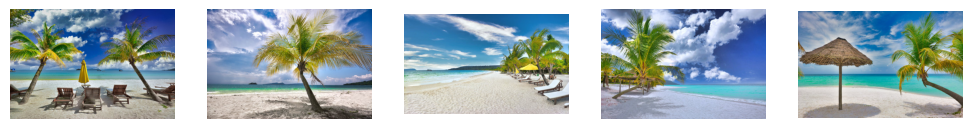

In [133]:
view_cluster(3)

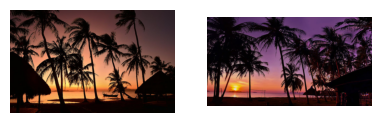

In [134]:
view_cluster(4)

In [135]:
view_cluster(5)

KeyError: 5

<Figure size 2500x2500 with 0 Axes>

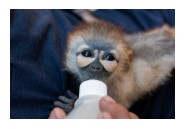

In [120]:
view_cluster(6)

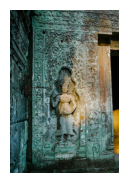

In [121]:
view_cluster(7)

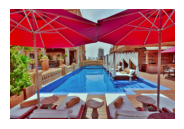

In [122]:
view_cluster(8)

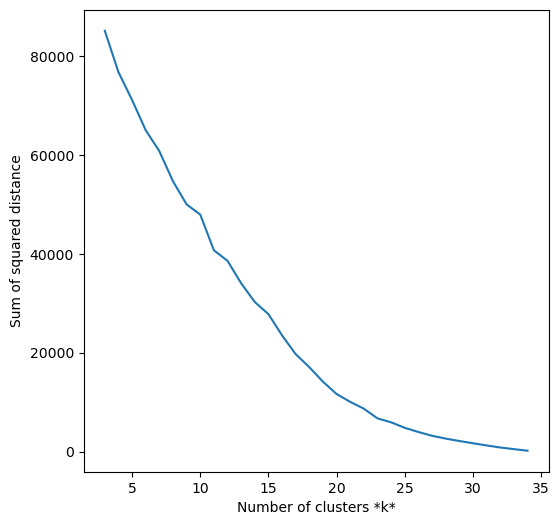

In [124]:
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(3, 35))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');